<a href="https://colab.research.google.com/github/Estteves/Estteves-Portfolio/blob/main/An%C3%A1lise_de_Dados_%7C_Uber_Drives_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://acedata.com.br/wp-content/uploads/2016/05/uberPOOL.jpg" alt="uber logo">


# **Análise de Dados** | Uber Drives 2016
**Portifólio**<br>
Autor [Estteves Santos](https://www.linkedin.com/in/estteves/)

---

# **Sobre o conjunto de dados**

**Conjunto de dados**



O conjunto de dados contém Data de início, Data de término, Local de início, Local de término, Quilômetros percorridos e Finalidade da viagem (comercial, pessoal, refeições, recados, reuniões, suporte ao cliente, etc.)

Os dados foram extarídos de: https://www.kaggle.com/datasets/zusmani/uberdrives

# **Inspiração**

Perguntei ao ChatGPT:

*Suponha que agora você é um grande gestor corporativo e precisa tomar alguma decisão baseada em dados sobre corridas da uber
tenho o seguinte data frame:
O conjunto de dados contém Data de início, Data de término, Local de início, Local de término, Quilômetros percorridos e Finalidade da viagem (comercial, pessoal, refeições, recados, reuniões, suporte ao cliente, etc.)
Sugira análises para que possa treinar minha habilidade com analise de dados.*

Ele me retornou com as seguintes informações:

*Algumas ideias que valem a pena explorar:*

*   Análise de viagens por categoria: Explore a distribuição das viagens entre pessoal ou a negócios para entender as principais categorias de uso do serviço.

*   Análise de viagens por local de partida e destino: Identifique os locais de partida e destino mais frequentes para entender as rotas mais populares e possíveis áreas de maior demanda.

*   Análise de quilômetros percorridos: Calcule a média, a mediana e a distribuição dos quilômetros percorridos nas viagens para entender a distância média e a dispersão dos deslocamentos.

*   Análise da duração das viagens: Calcule a duração média e a distribuição da duração das viagens para entender o tempo médio gasto nas corridas.

*   Análise de tendências de uso ao longo do tempo: Analise a demanda por viagens ao longo do tempo (por dia, semana ou mês) para identificar padrões sazonais ou tendências de crescimento.

*   Análise de relacionamentos entre variáveis: Explore possíveis correlações entre a distância percorrida, duração da viagem e motivo da viagem para entender possíveis padrões de comportamento dos usuários.

*   Análise de receita por categoria: Calcule a receita gerada por cada categoria de viagem para identificar as categorias mais lucrativas.

*   Análise de motivação para viagens: Identifique os principais motivos declarados pelos usuários para suas viagens e entenda as preferências dos clientes.

*   Análise da satisfação do cliente por categoria: Utilize feedbacks e avaliações dos clientes para medir a satisfação em relação a cada categoria de viagem.

*   Análise de segmentação de clientes por motivo: Agrupe os clientes com base nos motivos declarados para suas viagens e identifique diferentes perfis de clientes para personalizar a oferta de serviços. *

# **1. Pacotes e Blibiotecas**


In [447]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# **2. Exploração de Dados**

**Tratamento de Dados**

In [448]:
#Carregamento dos dados
dados_uber = pd.read_csv("/content/My Uber Drives - 2016.csv", sep =",")
dados_uber

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [449]:
#Renomar colunas
new_column_names = {
    'START_DATE*': 'Data de inicio',
    'END_DATE*': 'Data de termino',
    'CATEGORY*': 'Categoria',
    'START*': 'Local de partida',
    'STOP*': 'Local de destino',
    'MILES*': 'Quilometros percorridos',
    'PURPOSE*': 'Motivo',
}

dados_uber.rename(columns=new_column_names, inplace=True)
dados_uber

,Data de inicio,Data de termino,Categoria,Local de partida,Local de destino,Quilometros percorridos,Motivo
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [450]:
#Excluindo do DataFrame a útlima linha (total)
dados_uber = dados_uber.drop(1155)

In [451]:
#Tratamento de valores Nulos
dados_uber.isnull().any()

Data de inicio             False
Data de termino            False
Categoria                  False
Local de partida           False
Local de destino           False
Quilometros percorridos    False
Motivo                      True
dtype: bool

In [452]:
# Só temos valores nulos na coluna "Motivo", vamos verificar a quantidade
Motivos_nulos = dados_uber['Motivo'].isnull().sum()
Total_motivos = dados_uber['Motivo'].count()
print("Motivos nulos:", Motivos_nulos)
print("Total motivos:", Total_motivos)
#Podemos observar que mais de 40% dos motivos não foram preenchidos.
#Os dados nulos não serão preenchidos, pois podem interferir significadamente na análise.

Motivos nulos: 502
Total motivos: 653


# **3. Análises:**

### 3.1 Análise de viagens por categoria: Explore a distribuição das viagens entre pessoal ou negócios para entender as principais categorias de uso do serviço.

In [453]:
Categoria = dados_uber.groupby(['Categoria']).size().reset_index(name='Contagem')
Categoria

,Categoria,Contagem
0,Business,1078
1,Personal,77


**Análise**: Podemos observar que a principal categoria de viagens foi **negócios**.

### 3.2 Análise de viagens por local de partida e destino: Identifique os locais de partida e destino mais frequentes para entender as rotas mais populares e possíveis áreas de maior demanda.

In [454]:
locais_de_partida = dados_uber.groupby(['Local de partida']).size().reset_index(name='Contagem')
locais_de_partida = locais_de_partida.sort_values(by='Contagem', ascending=False)
print(locais_de_partida)

      Local de partida  Contagem
17                Cary       201
162   Unknown Location       148
103        Morrisville        85
175        Whitebridge        68
67           Islamabad        57
..                 ...       ...
50   Flatiron District         1
51            Florence         1
53       Fuquay-Varina         1
55             Gampaha         1
176      Winston Salem         1

[177 rows x 2 columns]


In [455]:
locais_de_destino = dados_uber.groupby(['Local de destino']).size().reset_index(name='Contagem')
locais_de_destino = locais_de_destino.sort_values(by='Contagem', ascending=False)
print(locais_de_destino)

     Local de destino  Contagem
20               Cary       203
171  Unknown Location       149
107       Morrisville        84
185       Whitebridge        65
69          Islamabad        58
..                ...       ...
62         Hog Island         1
60     Hell's Kitchen         1
58         Hayesville         1
57       Harden Place         1
187     Winston Salem         1

[188 rows x 2 columns]


**Análise**: Apesar de no dataset existirem divervos dados com localização desconhecida ('Unknown Location'), podemos verificar que o principal local de partida e destino é *Cary*, sem dúvida é a área de maior demanda.


### 3.3 Análise de quilômetros percorridos: Calcule a média, a mediana e a distribuição dos quilômetros percorridos nas viagens para entender a distância média e a dispersão dos deslocamentos.

In [456]:
dados_uber['Quilometros percorridos'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: Quilometros percorridos, dtype: float64

In [457]:
dados_uber['Quilometros percorridos'].mode()

0    9.9
Name: Quilometros percorridos, dtype: float64

**Análise**:

A média de quilômetros percorridos nas 1.155 viagens analisadas é de 10Km.

O valor de Quilometros percorridos que mais aparece no dataset é 9,9Km, valor bem próximo a média.

A mediana é 6Km.

O desvio padrão é de 21,5Km, ou seja existem variações significativas entre as viagens analisadas. Uma boa justificativa para esse desvido padrão alto é a diferença entre a média e o valor máximo de quilômetros percorridos, que foi de 310Km.


### 3.4 Análise da duração das viagens: Calcule a duração média e a distribuição da duração das viagens para entender o tempo médio gasto nas corridas.

In [458]:
#Transformando os dados para o formato datetime
dados_uber['Data de inicio'] = pd.to_datetime(dados_uber['Data de inicio'], format='%m/%d/%Y %H:%M')
dados_uber['Data de termino'] = pd.to_datetime(dados_uber['Data de termino'], format='%m/%d/%Y %H:%M')

# Calcular a diferença de tempo entre as colunas 'Data de termino' e 'Data de inicio'
dados_uber['Duracao viagem'] = (dados_uber['Data de termino'] - dados_uber['Data de inicio']).dt.total_seconds() / 60

In [459]:
dados_uber['Duracao viagem'].describe()

count    1155.000000
mean       23.243290
std        27.318277
min         0.000000
25%        10.000000
50%        16.000000
75%        27.500000
max       336.000000
Name: Duracao viagem, dtype: float64

**Análise:**
Analisando 1.155 corridas, o tempo médio de uma viagem é de 23 minutos. A viagem mais longa foi de 336 minutos.

### 3.5 Análise de tendências de uso ao longo do tempo: Analise a demanda por viagens ao longo do tempo (por dia, semana ou mês) para identificar padrões sazonais ou tendências de crescimento.

In [460]:
#Análise de demanda por mês
#Adicionar o mês no Dataframe
dados_uber['Mes'] = dados_uber['Data de inicio'].dt.month
viagens_por_mes = dados_uber['Mes'].value_counts().sort_index()
viagens_por_mes

1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
Name: Mes, dtype: int64

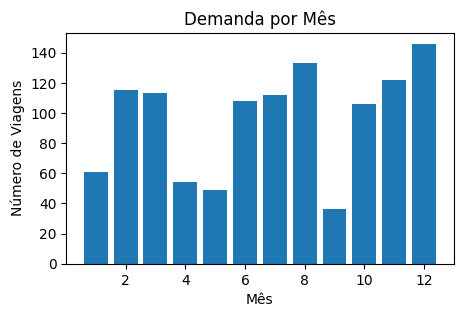

In [461]:
# Plotar o gráfico de barras para a demanda por mês
plt.figure(figsize=(5, 3))
plt.bar(viagens_por_mes.index, viagens_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Número de Viagens')
plt.title('Demanda por Mês')
plt.show()

**Análise**: Podemos observar que a demanda não foi constante durante o ano. O pico de demanda de viagens foi no mês 12 (Dezembro) e o mês com menor demanda foi o 9 (Setembro). Baseado nas constantes variações não é possível determinar uma tendência.

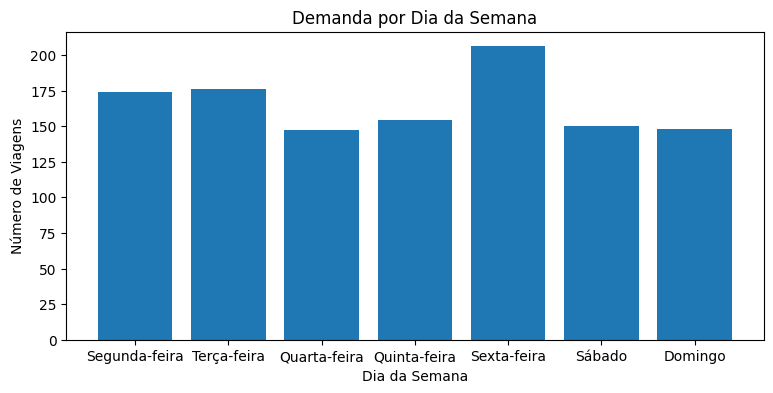

In [462]:
#Analisar por dia da semana
# Extrair o dia da semana (em formato numérico) de cada data de início
dados_uber['Dia da semana'] = dados_uber['Data de inicio'].dt.dayofweek

# Mapear o número do dia da semana para o nome do dia (0: segunda-feira, 1: terça-feira, ..., 6: domingo)
nomes_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
dados_uber['Dia da semana'] = dados_uber['Dia da semana'].map(lambda x: nomes_dias[x])

# Contar o número de viagens por dia da semana
viagens_por_dia = dados_uber['Dia da semana'].value_counts().reindex(nomes_dias)

# Plotar o gráfico de barras para a demanda por dia da semana
plt.figure(figsize=(9, 4))
plt.bar(viagens_por_dia.index, viagens_por_dia.values)
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Viagens')
plt.title('Demanda por Dia da Semana')
plt.show()

**Análise**: Podemos observar que a demanda de viagens por dia é constante durante a semana, o dia da semana com maior número de viagens é na sexta-feira.

### 3.6 Análise de relacionamentos entre variáveis: Explore possíveis correlações entre a distância percorrida, duração da viagem e motivo da viagem para entender possíveis padrões de comportamento dos usuários.

In [463]:
#Vamos calcular a correlação entre as variáveis Quilometros percorridos e a Duracao viagem utilizando a função CORRCOEF() do Numpy.
np.corrcoef(dados_uber['Quilometros percorridos'],dados_uber['Duracao viagem'])

array([[1.        , 0.84226219],
       [0.84226219, 1.        ]])

**Análise:** A correlação de 0.84 indica uma correlação positiva e alta. Baseado nisso, podemos afirmar que quanto maior a quilometragem percorrida maior é a duração da viagem.

In [464]:
# Agrupar por motivo e contar o número de viagens por motivo
motivo_contagem = dados_uber.groupby(['Motivo']).size().reset_index(name='Contagem')
motivo_contagem

,Motivo,Contagem
0,Airport/Travel,3
1,Between Offices,18
2,Charity ($),1
3,Commute,1
4,Customer Visit,101
5,Errand/Supplies,128
6,Meal/Entertain,160
7,Meeting,187
8,Moving,4
9,Temporary Site,50


In [465]:
# Calcular a média de quilômetros percorridos por motivo
motivo_media_quilometros = dados_uber.groupby(['Motivo'])['Quilometros percorridos'].mean().reset_index(name='Media Quilometros')
motivo_media_quilometros.round(2)

,Motivo,Media Quilometros
0,Airport/Travel,5.50
1,Between Offices,10.94
2,Charity ($),15.10
3,Commute,180.20
4,Customer Visit,20.69
5,Errand/Supplies,3.97
6,Meal/Entertain,5.70
7,Meeting,15.25
8,Moving,4.55
9,Temporary Site,10.47


In [466]:
# Combinar as informações em um único DataFrame e ordenar do maior para o menor
motivo_contagem_media = motivo_contagem.merge(motivo_media_quilometros, on='Motivo')
motivo_contagem_media = motivo_contagem_media.sort_values(by='Contagem', ascending=False)
print(motivo_contagem_media)

            Motivo  Contagem  Media Quilometros
7          Meeting       187          15.247594
6   Meal/Entertain       160           5.698125
5  Errand/Supplies       128           3.968750
4   Customer Visit       101          20.688119
9   Temporary Site        50          10.474000
1  Between Offices        18          10.944444
8           Moving         4           4.550000
0   Airport/Travel         3           5.500000
2      Charity ($)         1          15.100000
3          Commute         1         180.200000


**Análise:** Podemos afirmar que a maioria das viagens distantes (com Quilômetros acima da média de 10Km), foram por motivos de reunião (Meeting) e Visita ao cliente (Customer Visit).

A maioria das viagens mais curtas (com Quilômetros abaixo da média de 10Km), foram por motivos de Refeição/Entretenimento (Meal/Entertain) e Recados/suprimentos (Errand/Supplies).




### 3.7 Análise de receita por categoria: Calcule a receita gerada por cada categoria de viagem para identificar as categorias mais lucrativas.

In [467]:
categoria = dados_uber.groupby(['Categoria']).size().reset_index(name='Contagem')
#Calcular o total de viagens
Total = categoria['Contagem'].sum()

In [468]:
#Representação por categoria
categoria['Porcentagem'] = (categoria['Contagem'] / Total) * 100
categoria.round(2)

,Categoria,Contagem,Porcentagem
0,Business,1078,93.33
1,Personal,77,6.67


**Análise:** Como visto anteriormente, a categotia **Negócios** representa 93% das viagens. Como no dataset não temos informaç~eos sobre taxas de viagens, não é possível afirmar se existe diferença de tarifa por categoria, mas podemos concluir que a categoria **Negócios** representa maior receita.

### 3.8 Análise de motivação para viagens: Identifique os principais motivos declarados pelos usuários para suas viagens e entenda as preferências dos clientes.

In [469]:
motivo_contagem = dados_uber.groupby(['Motivo']).size().reset_index(name='Contagem')
motivo_contagem = motivo_contagem.sort_values(by='Contagem', ascending=False)
motivo_contagem

,Motivo,Contagem
7,Meeting,187
6,Meal/Entertain,160
5,Errand/Supplies,128
4,Customer Visit,101
9,Temporary Site,50
1,Between Offices,18
8,Moving,4
0,Airport/Travel,3
2,Charity ($),1
3,Commute,1


**Análise:** Os maiores motivos declarados das viagens foram para reuniões (Meeting), Refeição/Entretenimento (Meal/Entertain) e Recados/suprimentos (Errand/Supplies).

In [470]:
Motivos_nulos = dados_uber['Motivo'].isnull().sum()
Total_motivos_declarados = dados_uber['Motivo'].count()
total = Motivos_nulos + Total_motivos_declarados
print("Motivos nulos:", Motivos_nulos)
print("Total motivos declarados:", Total_motivos_declarados)
Percentual_de_motivos_declarados = (1-(Motivos_nulos/total)).round(4)*100
print("Percentual de motivos declarados: ",Percentual_de_motivos_declarados)

Motivos nulos: 502
Total motivos declarados: 653
Percentual de motivos declarados:  56.54


**Análise**: Vale resaltar que temos apenas **56%** das viagens com motivos declarados.


### 3.9 Análise da satisfação do cliente por categoria: Utilize feedbacks e avaliações dos clientes para medir a satisfação em relação a cada categoria de viagem.

**Análise**: Infelizmente no dataset não temos dados sobre feedbacks ou avaliações para medir a satisfação em relação a cada categoria de viagem.

### 3.10 Análise de segmentação de clientes por motivo: Agrupe os clientes com base nos motivos declarados para suas viagens e identifique diferentes perfis de clientes para personalizar a oferta de serviços.

In [471]:
dados_uber.head()

,Data de inicio,Data de termino,Categoria,Local de partida,Local de destino,Quilometros percorridos,Motivo,Duracao viagem,Mes,Dia da semana
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1,Sexta-feira
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,1,Sábado
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1,Sábado
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1,Terça-feira
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1,Quarta-feira


**Análise**: No dataset não temos dados sobre clientes, entende-se as informações foi de um único usuário. Nesse sentido, não é possível realizar uma análise por perfis.